# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [58]:
import pandas as pd

In [1]:
from __future__ import print_function, division

import nsfg

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [2]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [3]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [4]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [5]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [6]:
pregordr

0        1
1        2
2        1
3        2
4        3
5        1
6        2
7        3
8        1
9        2
10       1
11       1
12       2
13       3
14       1
15       2
16       3
17       1
18       2
19       1
20       2
21       1
22       2
23       1
24       2
25       3
26       1
27       1
28       2
29       3
        ..
13563    2
13564    3
13565    1
13566    1
13567    1
13568    2
13569    1
13570    2
13571    3
13572    4
13573    1
13574    2
13575    1
13576    1
13577    2
13578    1
13579    2
13580    1
13581    2
13582    3
13583    1
13584    2
13585    1
13586    2
13587    3
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [6]:
pregordr[0]

1

Select a slice from a column.

In [7]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [10]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [11]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [12]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Float64Index([ 7.0,  6.0,  8.0,  5.0,  9.0,  4.0, 10.0,  3.0,  2.0,  1.0, 11.0,
              12.0,  0.0, 13.0, 14.0, 15.0],
             dtype='float64')

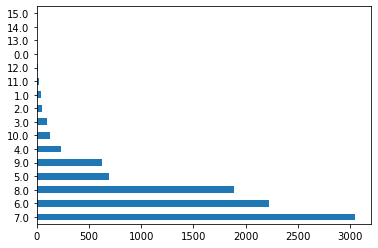

In [43]:
preg.birthwgt_lb.value_counts().plot(kind='barh')

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [44]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [50]:
birthord_counts = preg.birthord.value_counts()
birthord_counts 

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

Answer: The results are exactly the same.

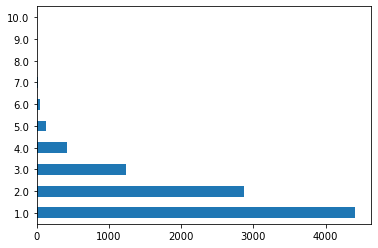

In [51]:
birthord_counts.plot(kind='barh')

We can also use `isnull` to count the number of nans.

In [52]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [82]:
preg.groupby(pd.cut(preg.prglngth, [0, 13, 26, 50])).count()['caseid']

prglngth
(0, 13]     3507
(13, 26]     793
(26, 50]    9278
Name: caseid, dtype: int64

There's a slight difference in children who were born before 13 weeks or less.

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [83]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [86]:
preg['totalwgt_kg'] = 0.45359237 * preg.totalwgt_lb
preg['totalwgt_kg']

0        3.997283
1        3.572040
2        4.139030
3        3.175147
4        2.806603
           ...   
13588    2.806603
13589         NaN
13590         NaN
13591    3.401943
13592    3.401943
Name: totalwgt_kg, Length: 13593, dtype: float64

In [87]:
preg['totalwgt_kg'].mean()

3.295633631632828

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [88]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [89]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [93]:
age_r_vcounts = resp.age_r.value_counts()
age_r_vcounts

30    292
22    287
23    282
31    278
32    273
37    271
24    269
21    267
25    267
36    266
35    262
29    262
26    260
20    258
33    257
38    256
40    256
34    255
27    255
43    253
28    252
41    250
19    241
44    235
18    235
17    234
16    223
15    217
39    215
42    215
Name: age_r, dtype: int64

In [96]:
print('Youngest: ', age_r_vcounts.index.min())
print('Oldest: ', age_r_vcounts.index.max())

Youngest:  15
Oldest:  44


We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [97]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [99]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118448
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494758
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899418
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118448


How old is the respondent with `caseid` 1?

In [115]:
case_1_age = int(resp[resp.caseid ==  1].age_r)
print('She is %s years old.' % case_1_age)

She is 44 years old.


What are the pregnancy lengths for the respondent with `caseid` 2298?

In [123]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [134]:
caseid_5012_weightkg = int(preg[preg.caseid==5012]['totalwgt_kg'])
print('It was %s kg.' % caseid_5012_weightkg)

It was 2 kg.
